# Dataset

In [1]:
import numpy as np

In [2]:
X_train = np.random.binomial(1, 0.5, (5000, 20))
X_val = np.random.binomial(1, 0.5, (1000, 20))
X_test = np.random.binomial(1, 0.5, (1000, 20))

# Model

In [3]:
from keras import Model, Input
from keras.layers import Dense
from keras import activations, losses, metrics
from keras.optimizers import Adam

In [4]:
# Encodeur
x1 = Input(shape = (20, ))
x2 = Dense(15, activation = activations.relu)(x1)
x3 = Dense(10, activation = activations.relu)(x2)
encodeur = Model(inputs = x1, outputs = x3)

# Decodeur
x4 = Input(shape = (10, ))
x5 = Dense(15, activation = activations.relu)(x4)
x6 = Dense(20, activation = activations.sigmoid)(x5)
decodeur = Model(inputs = x4, outputs = x6)

# Autoencodeur
autoencodeur = Model(inputs = x1, outputs = decodeur(x3))

In [5]:
autoencodeur.compile(optimizer = Adam(), loss = losses.binary_crossentropy, metrics = [metrics.binary_crossentropy])
history = autoencodeur.fit(x = X_train, y = X_train, validation_data = (X_val, X_val), batch_size = 256, epochs = 800,
                    verbose = 0)

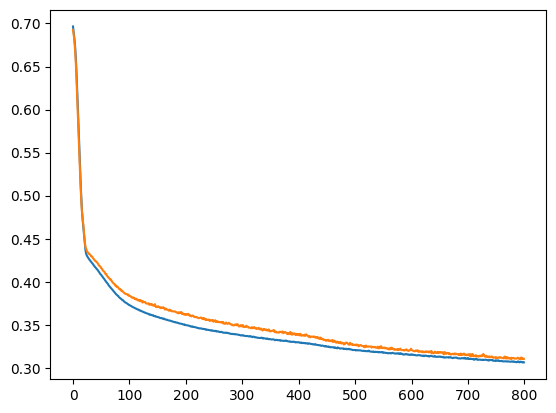

In [6]:
import matplotlib.pyplot as plt

plt.plot(range(len(history.history["binary_crossentropy"])), history.history["binary_crossentropy"])
plt.plot(range(len(history.history["binary_crossentropy"])), history.history["val_binary_crossentropy"])